# SHETH L.U.J. & SIR M.V. COLLEGE

**Rajanish bhardwaj | T073**

Practical No. 9

Aim :- Principal Component Analysis (PCA)

Perform PCA on a dataset to reduce dimensionality.
Evaluate the explained variance and select the appropriate number of principal
components.
Visualize the data in the reduced-dimensional space.

9.1 Reducing Features Using Principal Components


In [18]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
heart = pd.read_csv("heart.csv")

# Separate features and target
X = heart.drop(columns=['target'])

# Standardize the feature matrix
X = StandardScaler().fit_transform(X)

# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=0.95, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 13
Reduced number of features: 12


9.2 Reducing Features When Data Is Linearly Inseparable


Original number of features: 2
Reduced number of features: 1


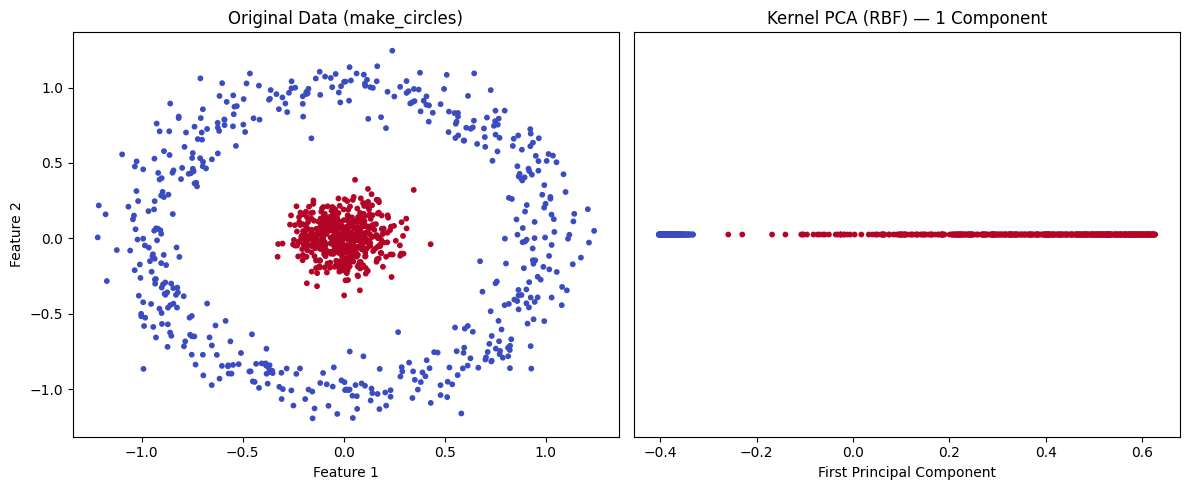

In [20]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# Generate linearly inseparable data
X, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kpca.shape[1])

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot original dataset
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
ax[0].set_title("Original Data (make_circles)")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Plot Kernel PCA 1-D projection
ax[1].scatter(X_kpca[:, 0], [0] * len(X_kpca), c=y, cmap='coolwarm', s=10)
ax[1].set_title("Kernel PCA (RBF) — 1 Component")
ax[1].set_xlabel("First Principal Component")
ax[1].set_yticks([])

plt.tight_layout()
plt.show()

9.3 Reducing Features by Maximizing Class Separability


Original number of features: 13
Reduced number of features: 1


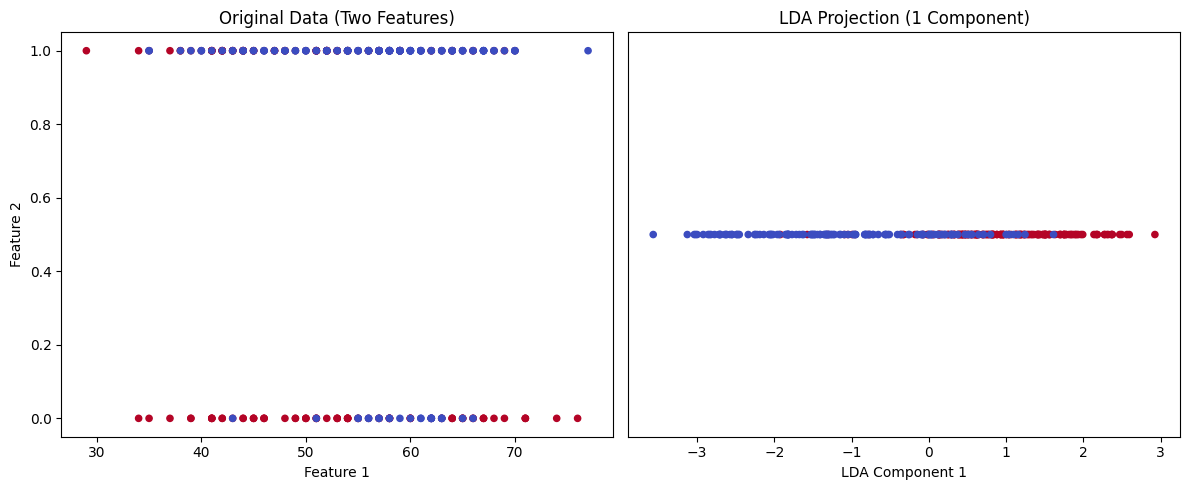

array([1.])

In [27]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate features and target
X = heart.drop(columns=['target']).values
y = heart['target'].values

# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# Run LDA and transform
X_lda = lda.fit(X, y).transform(X)

# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])


# Visualization
# Pick any two features for original plot (example: feature 0 and feature 1)
x1 = X[:, 0]
x2 = X[:, 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


# Plot original data (2 selected features)
scatter1 = ax[0].scatter(x1, x2, c=y, cmap='coolwarm', s=20)
ax[0].set_title("Original Data (Two Features)")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Plot LDA 1D projection
scatter2 = ax[1].scatter(X_lda[:, 0], [0]*len(X_lda), c=y, cmap='coolwarm', s=20)
ax[1].set_title("LDA Projection (1 Component)")
ax[1].set_xlabel("LDA Component 1")
ax[1].set_yticks([])

plt.tight_layout()
plt.show()
lda.explained_variance_ratio_